In [526]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

Підлкючення до гугл-диску.

In [527]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Зчитування файлу.

In [528]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cinema1.csv')
data.head(10)

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Unnamed: 28,war_symb_title,point_symb_title
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,NaN,4,0
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,NaN,8,0
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,NaN,1,0
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,NaN,3,0
4,4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN,9,0
5,5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,NaN,3,0
6,6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,NaN,2,0
7,7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000,NaN,1,0
8,8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000,NaN,4,0
9,9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000,NaN,7,0


Початок підготовки даних.

Почнемо з країн. Стовпець країн містить неіснуючі страни тож потрібно їх видалити.

In [529]:
data['country'].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'English', 'Philippines'], dtype=object)

New Line, Official site - назви неіснуючих країн. 2 з 5 помилок знайдено.

In [530]:
data = data[data['country'] != 'New Line']
data = data[data['country'] != 'Official site']

Видаляємо записи, в яких більше 10% полів не мають записів.

In [531]:
data = data.drop(data[(data.isnull().sum(axis = 1)/data.shape[1])*100 > 10].index)

Unnamed: 28 - третя з 5 помилок. Майже повністю пустий стовпець. 

In [532]:
del data['Unnamed: 28']

content_rating має пусті комірки, їх можна замінити на Not Rated.

In [533]:
data.loc[data['content_rating'].isnull(), 'content_rating'] = 'Not Rated'

Перевіряємо дані у стовпці рейтингу. Є запис з рейтингом 98. Це 4 помилка з 5ти.

In [534]:
data['imdb_score'].value_counts()

6.7     213
6.6     193
6.5     182
7.2     181
6.4     178
7.0     178
6.8     175
6.1     174
7.3     173
7.1     172
6.9     170
6.2     169
6.3     167
5.9     143
7.4     130
6.0     128
7.5     122
5.8     119
7.6     117
5.7     113
5.6     109
7.7     106
7.8      99
5.5      96
5.4      96
5.3      84
8.0      73
7.9      66
5.2      65
5.1      65
8.1      62
4.9      48
4.8      44
4.6      38
5.0      37
8.3      34
8.2      32
4.7      27
4.3      26
4.5      25
4.4      23
8.4      23
4.1      23
8.5      21
4.2      19
3.3      17
4.0      15
3.8      14
3.5      13
3.6      13
3.9      11
8.6      11
3.4      10
8.7       8
3.1       7
3.7       7
2.8       6
2.7       6
3.2       5
8.9       5
8.8       5
3.0       4
2.9       3
1.9       3
2.1       3
2.3       3
2.6       2
2.5       2
2.0       2
2.2       2
9.0       2
2.4       2
98.0      1
1.6       1
9.3       1
9.9       1
1.7       1
9.2       1
Name: imdb_score, dtype: int64

Потрібно видалити усі записи, де рейтинг більше 10.

In [535]:
data = data[data['imdb_score'] <= 10]
data['imdb_score'].value_counts()

6.7    213
6.6    193
6.5    182
7.2    181
7.0    178
6.4    178
6.8    175
6.1    174
7.3    173
7.1    172
6.9    170
6.2    169
6.3    167
5.9    143
7.4    130
6.0    128
7.5    122
5.8    119
7.6    117
5.7    113
5.6    109
7.7    106
7.8     99
5.4     96
5.5     96
5.3     84
8.0     73
7.9     66
5.2     65
5.1     65
8.1     62
4.9     48
4.8     44
4.6     38
5.0     37
8.3     34
8.2     32
4.7     27
4.3     26
4.5     25
4.4     23
8.4     23
4.1     23
8.5     21
4.2     19
3.3     17
4.0     15
3.8     14
3.6     13
3.5     13
3.9     11
8.6     11
3.4     10
8.7      8
3.7      7
3.1      7
2.8      6
2.7      6
8.9      5
8.8      5
3.2      5
3.0      4
2.9      3
2.1      3
1.9      3
2.3      3
2.2      2
2.0      2
2.5      2
9.0      2
2.4      2
2.6      2
1.7      1
9.2      1
9.9      1
1.6      1
9.3      1
Name: imdb_score, dtype: int64

Пусті поля у стовпцях з числовими даними заповнюємо середнім за цими стовпцями.

In [536]:
data = data.fillna(data.mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4724 entries, 0 to 5049
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 4724 non-null   int64  
 1   color                      4719 non-null   object 
 2   director_name              4724 non-null   object 
 3   num_critic_for_reviews     4724 non-null   float64
 4   duration                   4724 non-null   float64
 5   director_facebook_likes    4724 non-null   float64
 6   actor_3_facebook_likes     4724 non-null   float64
 7   actor_2_name               4724 non-null   object 
 8   actor_1_facebook_likes     4724 non-null   float64
 9   gross                      4724 non-null   float64
 10  genres                     4724 non-null   object 
 11  actor_1_name               4724 non-null   object 
 12  movie_title                4724 non-null   object 
 13  num_voted_users            4724 non-null   objec

Залаишилося ще кілька записів з пустими строковими значеннями. Видалимо ці залишки.

In [537]:
data = data.dropna()

1. Побудувати розподіли жанрів за рейтингом, прибутком та кількістю лайків.

In [538]:
data_split = (data.set_index(data.columns.drop('genres',1).tolist())
   .genres.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'genres'}))
data_split.head()

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title,level_30,genres
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,4,0,0,Action
1,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,4,0,1,Adventure
2,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,4,0,2,Fantasy
3,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,4,0,3,Sci-Fi
4,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,8,0,0,Action


Жанри та Рейтинги фільмів по цим жанрам.

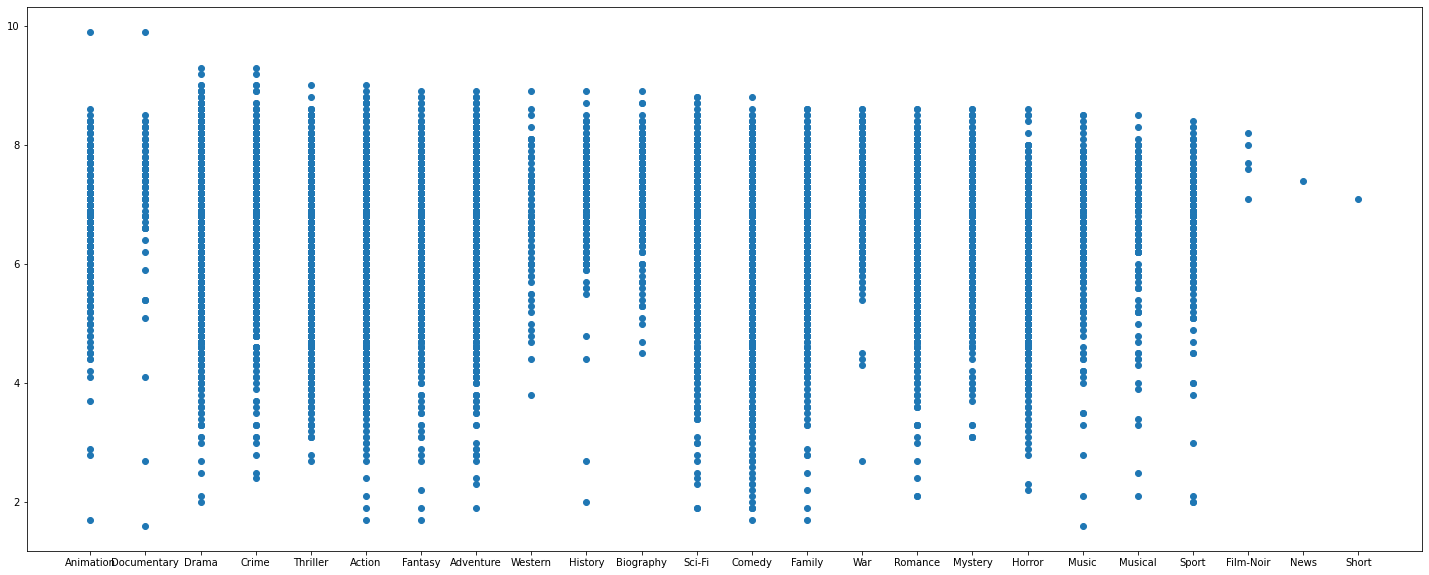

In [539]:
data_split = data_split.sort_values(by='imdb_score', ascending=False)
plt.figure(figsize=(25, 10))
plt.scatter(data_split['genres'], data_split['imdb_score'])

In [540]:
scores_mean = data_split.groupby(['genres']).agg({'imdb_score': 'mean'})
scores_mean.sort_values(ascending=False, by='imdb_score').head(20)

,imdb_score
genres,
Film-Noir,7.720000
News,7.400000
Documentary,7.214286
Biography,7.166784
Short,7.100000
History,7.082383
War,7.059701
Western,6.770787
Drama,6.766135


Жанри та прибуток, що вони приносять.

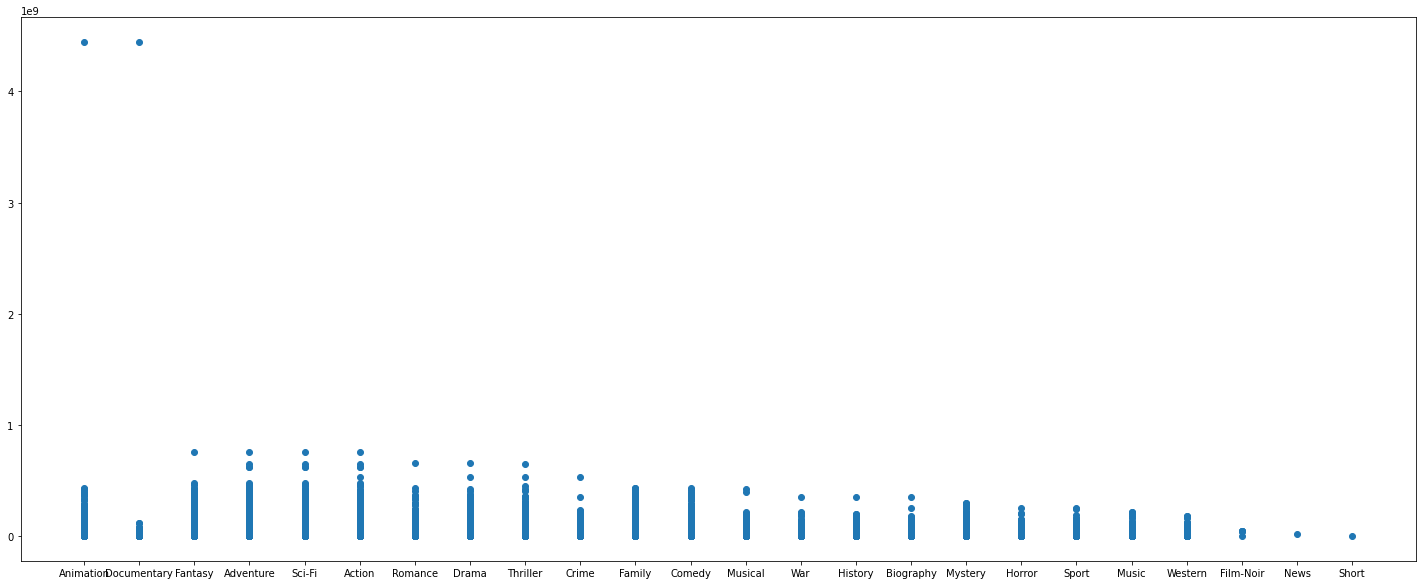

In [541]:
data_split = data_split.sort_values(by='gross', ascending=False)
plt.figure(figsize=(25, 10))
plt.scatter(data_split['genres'], data_split['gross'])

Підрахунок середьного прибутку за жанрами.

In [542]:
gross_mean = data_split.groupby(['genres']).agg({'gross': 'mean'})
gross_mean = gross_mean.sort_values(ascending=False, by='gross')
gross_mean['gross'] = gross_mean['gross'].apply(lambda x: x / 1_000_000 // 1).apply(lambda x: str(x) + ' mln')
gross_mean.head(20)

,gross
genres,
Animation,120.0 mln
Adventure,94.0 mln
Family,86.0 mln
Fantasy,82.0 mln
Sci-Fi,78.0 mln
Action,73.0 mln
Documentary,69.0 mln
Musical,53.0 mln
Comedy,48.0 mln


Жанри та кількість лайків.

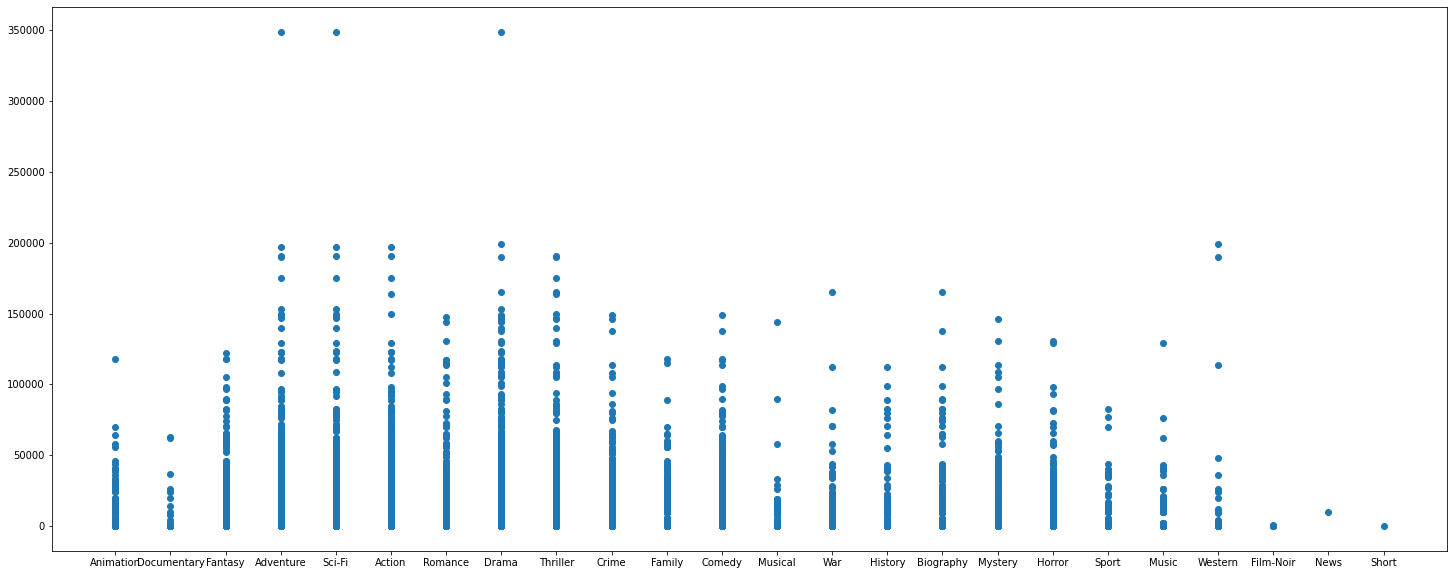

In [543]:
plt.figure(figsize=(25, 10))
plt.scatter(data_split['genres'],data_split['movie_facebook_likes'])

In [544]:
likes_mean = data_split.groupby('genres').agg({'movie_facebook_likes': 'mean'})
likes_mean.sort_values(by='movie_facebook_likes', ascending=False).head(20)

,movie_facebook_likes
genres,
Sci-Fi,15555.213793
Adventure,13396.904870
Fantasy,11422.986135
Biography,11250.155477
Action,10868.298808
News,10000.000000
Mystery,8775.074725
Thriller,8534.971256
Western,8339.056180


2. Знайти топ 20 зв'язок актор-режисер, що приносять разом більший прибуток.

In [545]:
actors_1 = data.groupby(['actor_1_name', 'director_name'])['gross'].agg('max')
actors_1 = actors_1.sort_values(ascending=False)

actors_2 = data.groupby(['actor_2_name', 'director_name'])['gross'].agg('max')
actors_2 = actors_2.sort_values(ascending=False)

actors_3 = data.groupby(['actor_3_name', 'director_name'])['gross'].agg('max')
actors_3 = actors_3.sort_values(ascending=False)

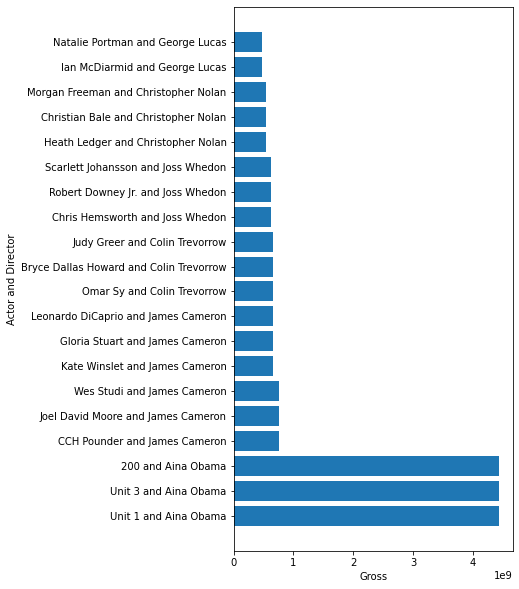

In [546]:
top20 = pd.concat([actors_1, actors_2, actors_3]).reset_index()
top20.rename({'actor_1_name': 'actor_name'}, inplace=True)

top20 = top20.sort_values(ascending=False, by='gross')
top20 = top20.head(20)
top20['actor_director'] = top20['actor_1_name'] + ' and ' + top20['director_name']
del top20['actor_1_name']
del top20['director_name']
plt.figure(figsize=(5, 10))
plt.barh(top20['actor_director'], top20['gross'])  
plt.ylabel('Actor and Director') 
plt.xlabel('Gross') 
plt.show() 


Актори з іменами 200, Unit 3, Unit 1 - це остання помилка.

In [547]:
data = data[data['director_name'] != 'Aina Obama']

3. Знайти країни з найбільшим середнім рейтингом фільмів.

Групуємо дані за країнами та середнім рейтингом.

In [548]:
mean_data = data.groupby(['country'])['imdb_score'].agg('mean').reset_index().sort_values(by='imdb_score', ascending=False)
mean_data

,country,imdb_score
29,Kyrgyzstan,8.700000
30,Libya,8.400000
43,Soviet Union,8.100000
24,Iran,7.725000
26,Israel,7.633333
23,Indonesia,7.600000
11,Colombia,7.500000
1,Argentina,7.500000
45,Sweden,7.400000
0,Afghanistan,7.400000


Тепер можна побудувати графік. Але країни з найбільшим рейтингом зняли не дуже багато фільмів тож насправді цей розподіл не дуже точний.

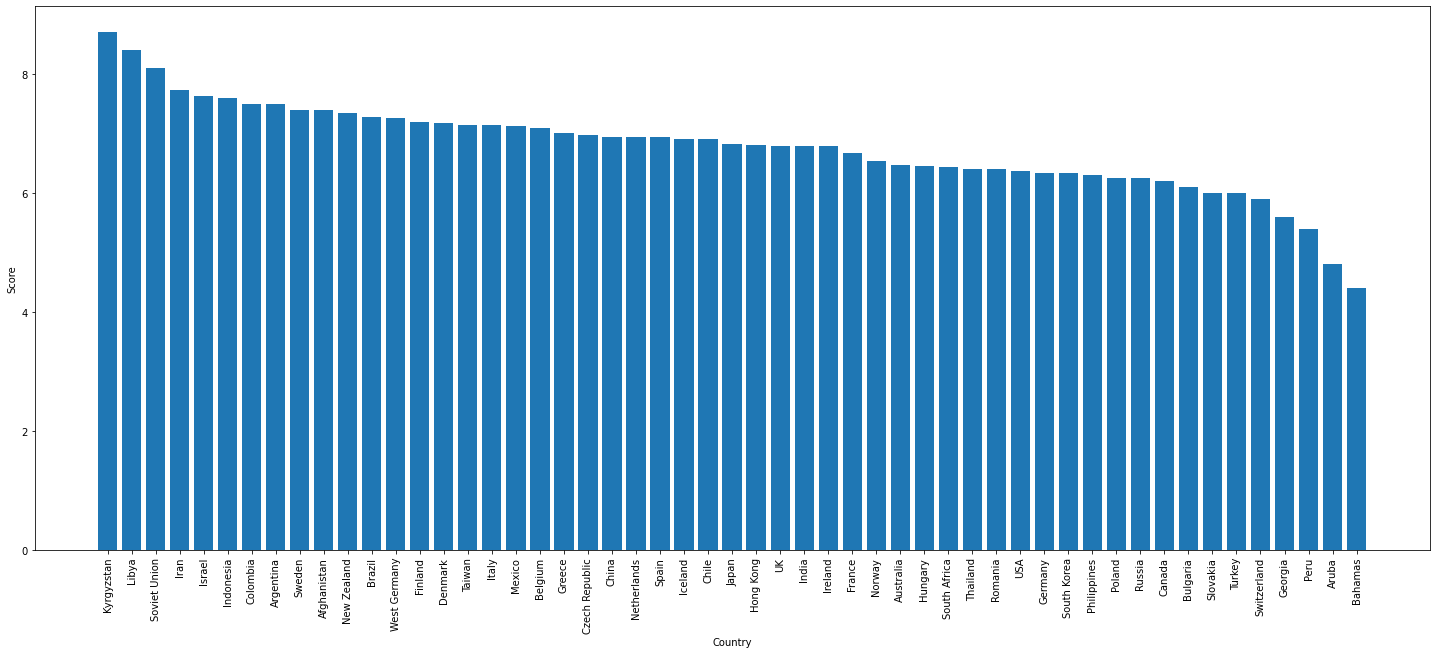

In [549]:
plt.figure(figsize=(25, 10))
plt.bar(mean_data['country'], mean_data['imdb_score'])  
plt.ylabel('Score') 
plt.xlabel('Country') 
plt.xticks(rotation=90)
plt.show() 

4. Найпопулярніші сюжети у фільмах жанру драма.


In [550]:
dramas = data_split.drop(data_split[data_split['genres'] != 'Drama'].index)
dramas_split_by_plots = (dramas.set_index(dramas.columns.drop('plot_keywords',1).tolist())
   .plot_keywords.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'keyword'}))
top20_plots = dramas_split_by_plots['keyword'].value_counts().reset_index().rename(columns={'index':'plot', 'keyword':'freq'})
top20_plots['plot'].nunique()

4863

Нормуємо, щоб отримати частоти кожного слова та обирємо 20 самих популярних.

In [551]:
most_frequent_plot = top20_plots['freq'].sum()
top20_plots['freq'] = top20_plots['freq'].apply(lambda x: x/most_frequent_plot)
top20_plots = top20_plots.head(20)

Будуємо графік, як можна побачити - найчастіший сюжет драм про кохання, більше ніж 1 процент з 4863 сюжетів. За ним йдуть друзі та вбивства.

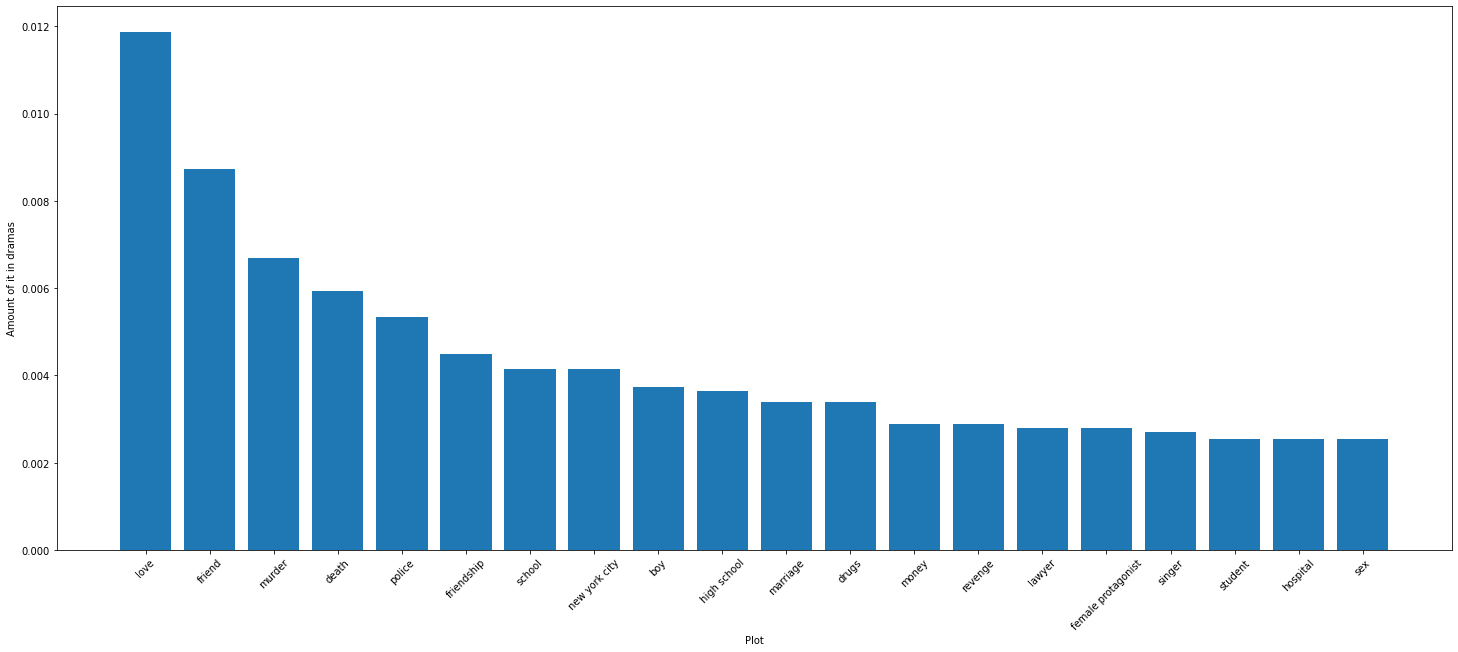

In [552]:
plt.figure(figsize=(25, 10))
plt.bar(top20_plots['plot'], top20_plots['freq'])  
plt.ylabel('Amount of it in dramas') 
plt.xlabel('Plot') 
plt.xticks(rotation=45)
plt.show() 

5. Чи впливає віковий рейтинг на бюджет фільму?



На мою думку Approved та Passed можн віднести до однієї категорії. Те ж саме з Not Rated та Unrated. Тож сзробимо це.

In [553]:
data.loc[data['content_rating'] == 'Approved', 'content_rating'] = 'Passed'
data.loc[data['content_rating'] == 'Not Rated', 'content_rating'] = 'Unrated'

Середній бюджет фільмів по віковому рейтингу.

In [554]:
age_rate = data.groupby(['content_rating'])['budget'].agg('mean').reset_index().sort_values(by='budget', ascending=False)
age_rate

,content_rating,budget
5,PG-13,5.413606e+07
4,PG,4.893396e+07
0,G,4.455140e+07
7,R,3.461353e+07
8,TV-14,1.792835e+07
11,Unrated,1.390476e+07
1,GP,1.259701e+07
2,M,1.191701e+07
3,NC-17,7.940714e+06
6,Passed,6.848934e+06


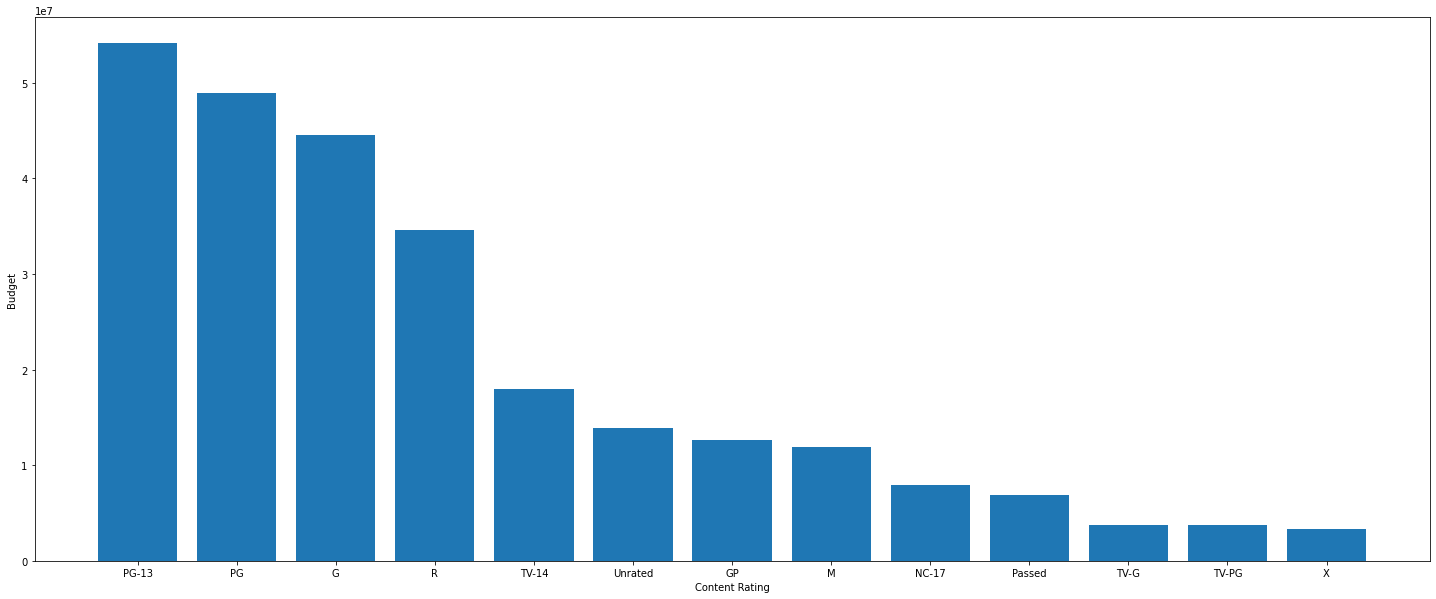

In [555]:
plt.figure(figsize=(25, 10))
plt.bar(age_rate['content_rating'], age_rate['budget'])  
plt.ylabel('Budget') 
plt.xlabel('Content Rating') 
plt.show() 

Збережемо фінальний файл.

In [556]:
data.to_csv('clear.csv')

Тепер ми маємо оброблені дані.

In [557]:
data = pd.read_csv('clear.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4656 entries, 0 to 4655
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 4656 non-null   int64  
 1   Unnamed: 0.1               4656 non-null   int64  
 2   color                      4656 non-null   object 
 3   director_name              4656 non-null   object 
 4   num_critic_for_reviews     4656 non-null   float64
 5   duration                   4656 non-null   float64
 6   director_facebook_likes    4656 non-null   float64
 7   actor_3_facebook_likes     4656 non-null   float64
 8   actor_2_name               4656 non-null   object 
 9   actor_1_facebook_likes     4656 non-null   float64
 10  gross                      4656 non-null   float64
 11  genres                     4656 non-null   object 
 12  actor_1_name               4656 non-null   object 
 13  movie_title                4656 non-null   objec

Повторюємо всі завдання (тепер без попередньої обробки)

In [558]:
data_split = (data.set_index(data.columns.drop('genres',1).tolist())
   .genres.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'genres'}))
data_split.head()

,Unnamed: 0,Unnamed: 0.1,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title,level_31,genres
0,0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,4,0,0,Action
1,0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,4,0,1,Adventure
2,0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,4,0,2,Fantasy
3,0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,4,0,3,Sci-Fi
4,1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,8,0,0,Action


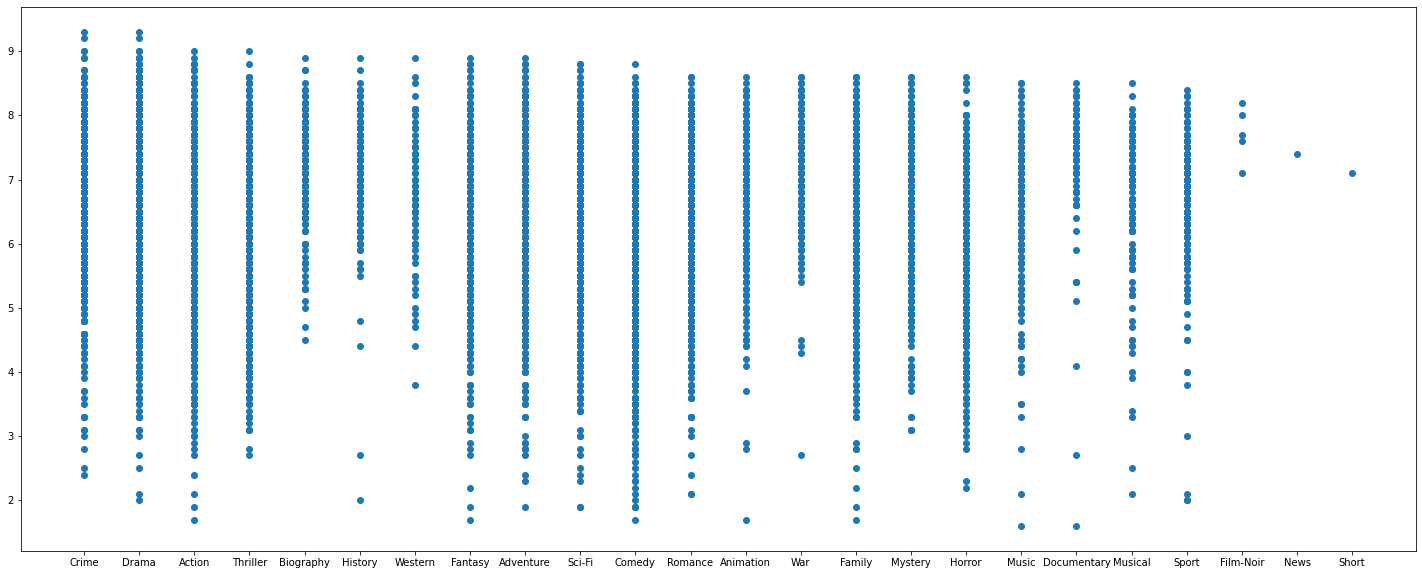

In [559]:
data_split = data_split.sort_values(by='imdb_score', ascending=False)
plt.figure(figsize=(25, 10))
plt.scatter(data_split['genres'], data_split['imdb_score'])

In [560]:
scores_mean = data_split.groupby(['genres']).agg({'imdb_score': 'mean'})
scores_mean.sort_values(ascending=False, by='imdb_score').head(20)

,imdb_score
genres,
Film-Noir,7.720000
News,7.400000
Documentary,7.181928
Biography,7.166784
Short,7.100000
History,7.082383
War,7.059701
Western,6.770787
Drama,6.766135


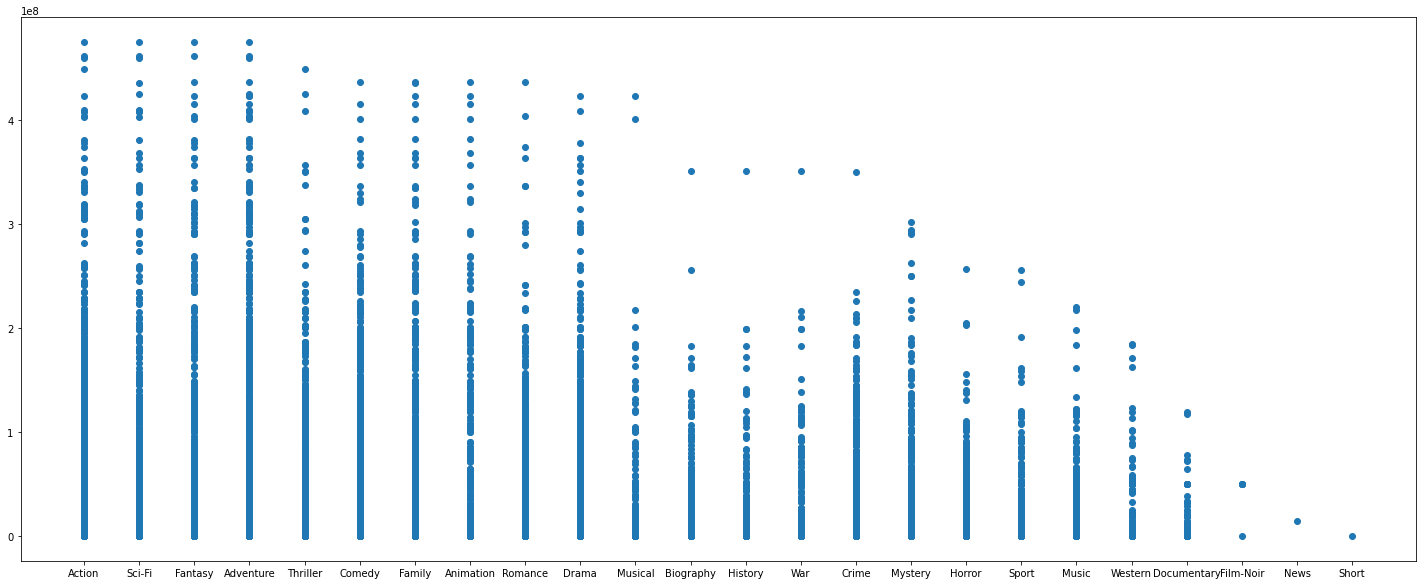

In [561]:
data_split = data_split.sort_values(by='gross', ascending=False)
data_split_copy = data_split[data_split['gross'] < 5 * (10 ** 8)]
plt.figure(figsize=(25, 10))
plt.scatter(data_split_copy['genres'], data_split_copy['gross'])

In [562]:
gross_mean = data_split_copy.groupby(['genres']).agg({'gross': 'mean'})
gross_mean = gross_mean.sort_values(ascending=False, by='gross')
gross_mean['gross'] = gross_mean['gross'].apply(lambda x: x / 1_000_000 // 1).apply(lambda x: str(x) + ' mln')
gross_mean.head(20)

,gross
genres,
Animation,101.0 mln
Adventure,91.0 mln
Family,86.0 mln
Fantasy,81.0 mln
Sci-Fi,74.0 mln
Action,71.0 mln
Musical,53.0 mln
Comedy,48.0 mln
Thriller,46.0 mln


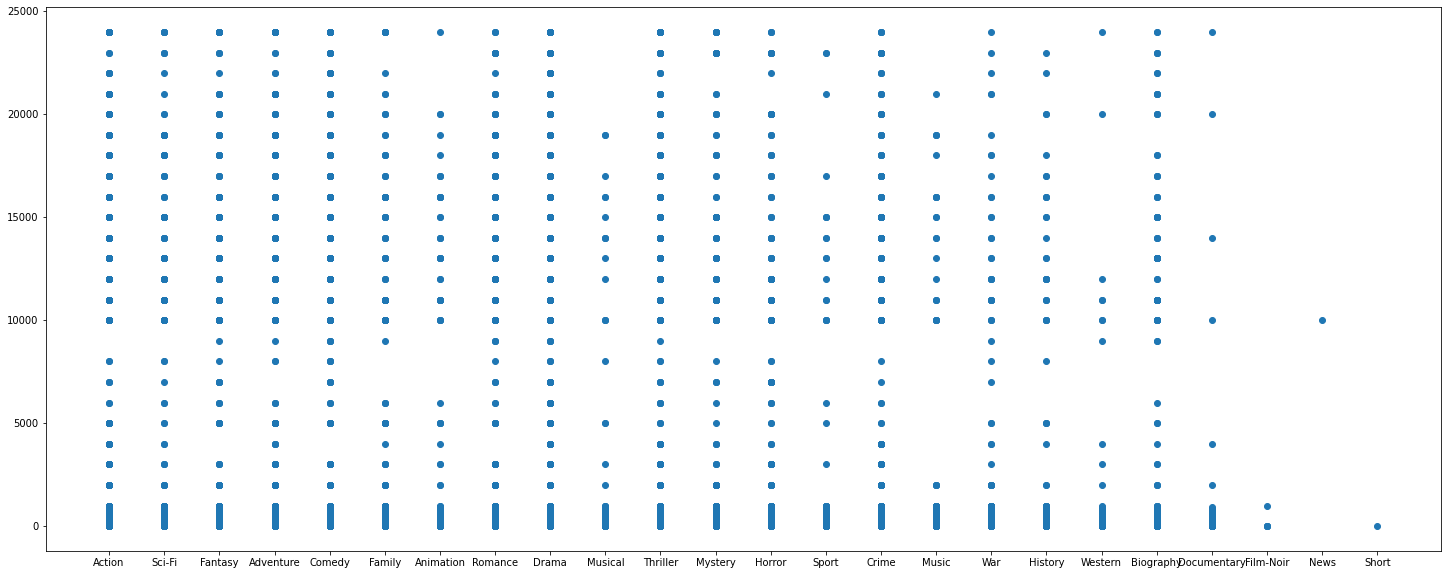

In [563]:
data_split_copy = data_split[data_split['movie_facebook_likes'] < 25000]
plt.figure(figsize=(25, 10))
plt.scatter(data_split_copy['genres'], data_split_copy['movie_facebook_likes'])

In [564]:
likes_mean = data_split_copy.groupby('genres').agg({'movie_facebook_likes': 'mean'})
likes_mean.sort_values(by='movie_facebook_likes', ascending=False).head(20)

,movie_facebook_likes
genres,
News,10000.000000
Fantasy,4066.245868
Biography,3786.914286
Mystery,3295.171642
Adventure,3222.862826
Sci-Fi,3112.362851
Horror,3017.222689
Action,2923.248394
Animation,2863.882653


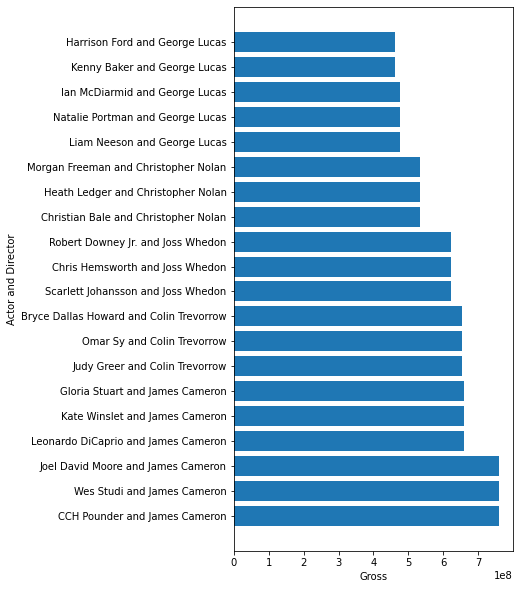

In [565]:
actors_1 = data.groupby(['actor_1_name', 'director_name'])['gross'].agg('max')
actors_1 = actors_1.sort_values(ascending=False)

actors_2 = data.groupby(['actor_2_name', 'director_name'])['gross'].agg('max')
actors_2 = actors_2.sort_values(ascending=False)

actors_3 = data.groupby(['actor_3_name', 'director_name'])['gross'].agg('max')
actors_3 = actors_3.sort_values(ascending=False)

top20 = pd.concat([actors_1, actors_2, actors_3]).reset_index()
top20.rename({'actor_1_name': 'actor_name'}, inplace=True)
top20 = top20.sort_values(ascending=False, by='gross')
top20 = top20.head(20)
top20['actor_director'] = top20['actor_1_name'] + ' and ' + top20['director_name']
del top20['actor_1_name']
del top20['director_name']
plt.figure(figsize=(5, 10))
plt.barh(top20['actor_director'], top20['gross'])  
plt.ylabel('Actor and Director') 
plt.xlabel('Gross') 
plt.show() 

In [566]:
top20.head(20).sort_values(by='gross', ascending=False)

,gross,actor_director
0,760505847.0,CCH Pounder and James Cameron
8709,760505847.0,Wes Studi and James Cameron
4261,760505847.0,Joel David Moore and James Cameron
1,658672302.0,Leonardo DiCaprio and James Cameron
4262,658672302.0,Kate Winslet and James Cameron
8710,658672302.0,Gloria Stuart and James Cameron
4263,652177271.0,Judy Greer and Colin Trevorrow
8711,652177271.0,Omar Sy and Colin Trevorrow
2,652177271.0,Bryce Dallas Howard and Colin Trevorrow
4264,623279547.0,Robert Downey Jr. and Joss Whedon


In [567]:
countries = data.groupby(['country'])['movie_title'].agg('count')
countries = countries.sort_values()
countries = (countries >= 10).reset_index()
countries = countries.loc[countries['movie_title'],:]
del countries['movie_title']
mean_data = data.groupby(['country'])['imdb_score'].agg('mean')
mean_data = pd.merge(mean_data, countries, on=['country'], how='outer', indicator=True)
mean_data = mean_data.loc[mean_data['_merge'] == 'both'].drop('_merge', axis=1)
mean_data = mean_data.sort_values(by='imdb_score', ascending=False)
mean_data.head(30)

,country,imdb_score
33,New Zealand,7.350000
13,Denmark,7.172727
27,Italy,7.150000
31,Mexico,7.118182
10,China,6.947826
44,Spain,6.938710
28,Japan,6.825000
19,Hong Kong,6.813333
50,UK,6.796651
22,India,6.791304


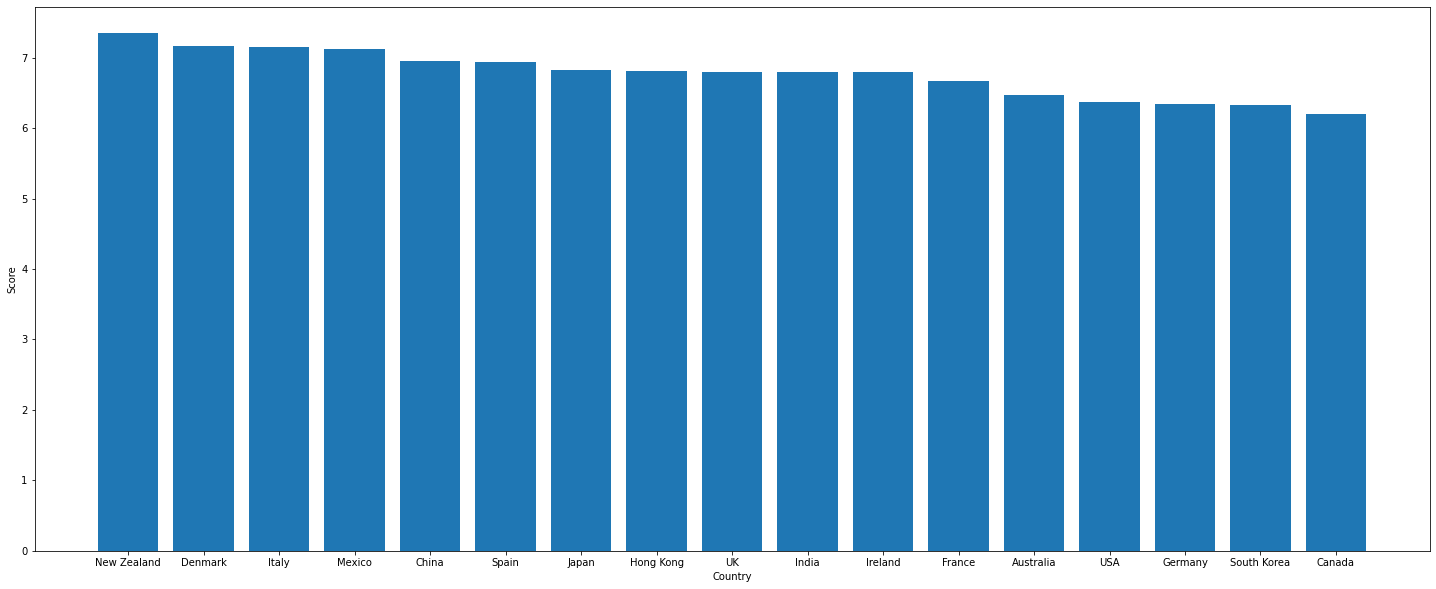

In [568]:
plt.figure(figsize=(25, 10))
plt.bar(mean_data['country'], mean_data['imdb_score'])  
plt.ylabel('Score') 
plt.xlabel('Country') 
plt.show() 

In [569]:
dramas = data_split.drop(data_split[data_split['genres'] != 'Drama'].index)
dramas_split_by_plots = (dramas.set_index(dramas.columns.drop('plot_keywords',1).tolist())
   .plot_keywords.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'keyword'}))
top20_plots = dramas_split_by_plots['keyword'].value_counts().reset_index().rename(columns={'index':'plot', 'keyword':'freq'})
top20_plots['plot'].nunique()

4863

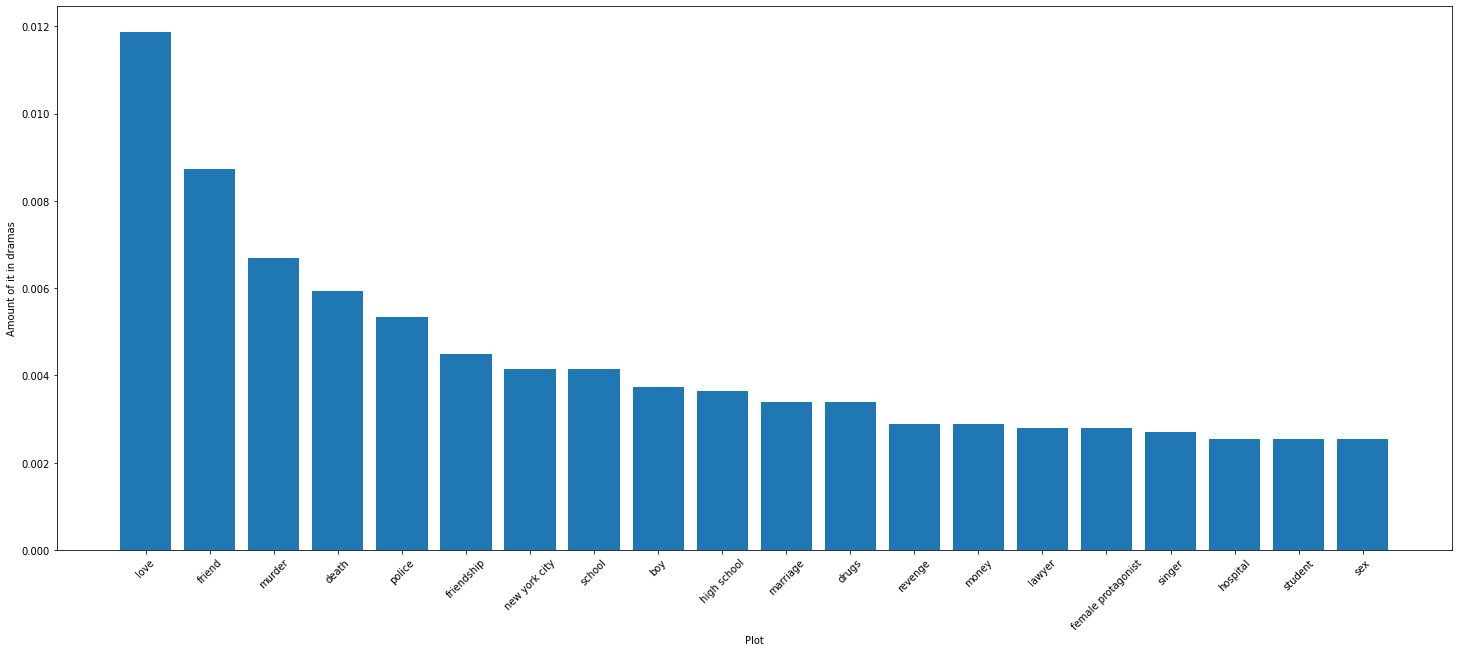

In [570]:
most_frequent_plot = top20_plots['freq'].sum()
top20_plots['freq'] = top20_plots['freq'].apply(lambda x: x/most_frequent_plot)
top20_plots = top20_plots.head(20)

plt.figure(figsize=(25, 10))
plt.bar(top20_plots['plot'], top20_plots['freq'])  
plt.ylabel('Amount of it in dramas') 
plt.xlabel('Plot') 
plt.xticks(rotation=45)
plt.show() 

In [571]:
age_rate = data.groupby(['content_rating'])['budget'].agg('mean').reset_index().sort_values(by='budget', ascending=False)
age_rate

,content_rating,budget
5,PG-13,5.413606e+07
4,PG,4.893396e+07
0,G,4.455140e+07
7,R,3.461353e+07
8,TV-14,1.792835e+07
11,Unrated,1.390476e+07
1,GP,1.259701e+07
2,M,1.191701e+07
3,NC-17,7.940714e+06
6,Passed,6.848934e+06


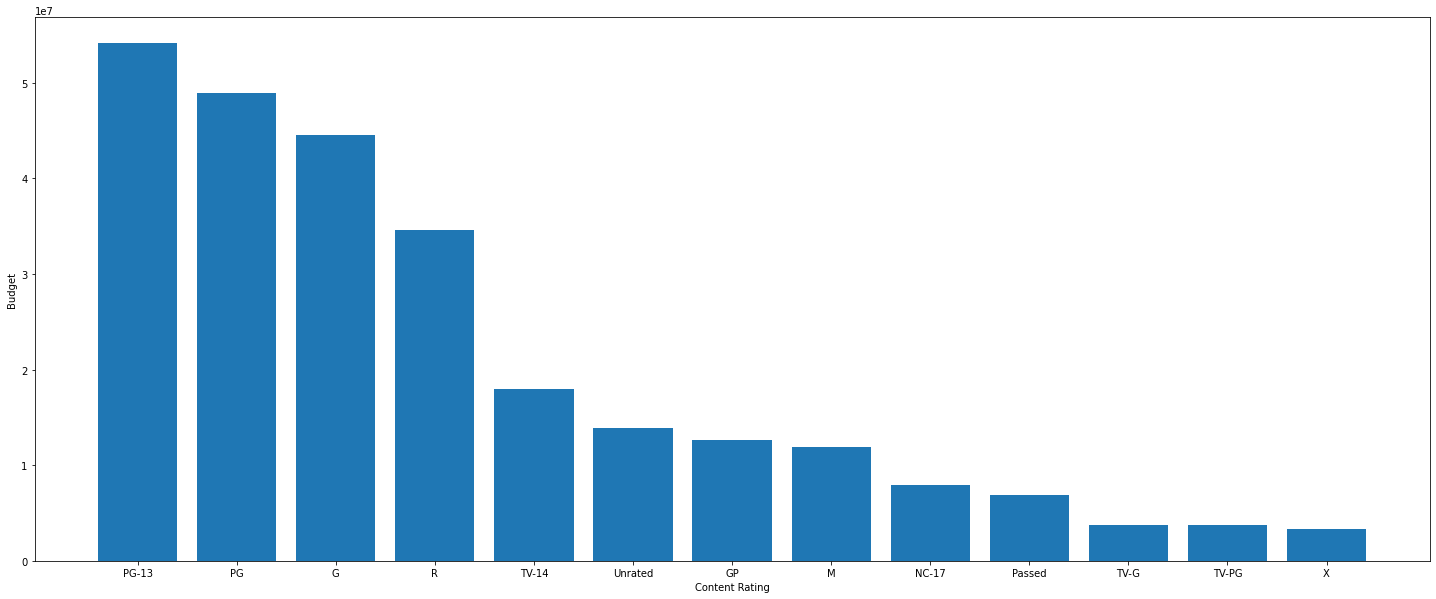

In [572]:
plt.figure(figsize=(25, 10))
plt.bar(age_rate['content_rating'], age_rate['budget'])  
plt.ylabel('Budget') 
plt.xlabel('Content Rating') 
plt.show() 

Друга частина.

Шукаємо самий високий середній рейтинг та актора з найбільшою кількістю лайків.

In [573]:
director_score = data.groupby('director_name').agg({'imdb_score':'mean'}).sort_values(by='imdb_score', ascending=False).reset_index()
director = director_score.iloc[0]['director_name']
highest_score = director_score.iloc[0]['imdb_score']
print(director, highest_score)
actor_1_likes = data.groupby('actor_1_name').agg({'actor_1_facebook_likes': 'max'}).rename(columns={'actor_1_facebook_likes': 'likes'})
actor_2_likes = data.groupby('actor_2_name').agg({'actor_2_facebook_likes': 'max'}).rename(columns={'actor_2_facebook_likes': 'likes'})
actor_3_likes = data.groupby('actor_3_name').agg({'actor_3_facebook_likes': 'max'}).rename(columns={'actor_3_facebook_likes': 'likes'})
actor_likes = pd.concat([actor_1_likes, actor_2_likes, actor_3_likes]).sort_values(by='likes', ascending=False).reset_index()
actor = actor_likes.iloc[0]['index']
likes = actor_likes.iloc[0]['likes']
print(actor, likes)

Sadyk Sher-Niyaz 8.7
Darcy Donavan 640000.0


Х - дані, від яких потрібно перевірити залежність

In [574]:
X = data[['imdb_score', 'actor_1_facebook_likes']]
X.head(20)

,imdb_score,actor_1_facebook_likes
0,7.9,1000.0
1,7.1,40000.0
2,6.8,11000.0
3,8.5,27000.0
4,6.6,640.0
5,6.2,24000.0
6,7.8,799.0
7,7.5,26000.0
8,7.5,25000.0
9,6.9,15000.0


Y - шукаєме значення

In [575]:
Y = data['gross']
Y.head(20)

0     760505847.0
1     309404152.0
2     200074175.0
3     448130642.0
4      73058679.0
5     336530303.0
6     200807262.0
7     458991599.0
8     301956980.0
9     330249062.0
10    200069408.0
11    168368427.0
12    423032628.0
13     89289910.0
14    291021565.0
15    141614023.0
16    623279547.0
17    241063875.0
18    179020854.0
19    255108370.0
Name: gross, dtype: float64

Робимо навчальні та тестові дані.

Отримуємо коефіцієнти регресії, та підставляємо їх та отримані раніше значення у рівняння регресії.


In [576]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=13)
lr = LinearRegression()
lr.fit(X_train, Y_train)
coef = lr.coef_
predicted = highest_score * coef[0] + likes * coef[1]
print(predicted // 1)

452909887.0


Жанр знятого фільму ніяк не впливає, впливють тільки успіхи режисера та популярність актора.